In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import io
import requests
from sklearn.datasets import make_regression
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv("Letter-Recognition.csv")

In [3]:
df

,Letter,X_horizontal,Y_vertical,Width,Height,Onpix,X-bar,Y-bar,X2bar,Y2bar,XYbar,X2Ybar,XY2bar,X-edge,XegvY,Y-edge,YegvX
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


### 資料前處理

In [4]:
df_drop = df.dropna()

label_map = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8,'I':9,'J':10,'K':11,'L':12,'M':13,'N':14,'O':15,'P':16,'Q':17,'R':18,'S':19,'T':20,'U':21,'V':22,'W':23,'X':24,'Y':25,'Z':26}
df_drop['Class'] = df_drop['Letter'].map(label_map)
data_le = df_drop

print(data_le)
data_le1 = data_le.drop(labels=['Letter'],axis=1).values
print("Check missin data(NAN mount):", len(np.where(np.isnan(data_le1))[0]))

#引用來源 https://www.youtube.com/watch?v=1epy1EKVDkc

      Letter  X_horizontal  Y_vertical  Width  Height  Onpix  X-bar  Y-bar  \
0          T             2           8      3       5      1      8     13   
1          I             5          12      3       7      2     10      5   
2          D             4          11      6       8      6     10      6   
3          N             7          11      6       6      3      5      9   
4          G             2           1      3       1      1      8      6   
...      ...           ...         ...    ...     ...    ...    ...    ...   
19995      D             2           2      3       3      2      7      7   
19996      C             7          10      8       8      4      4      8   
19997      T             6           9      6       7      5      6     11   
19998      S             2           3      4       2      1      8      7   
19999      A             4           9      6       6      2      9      5   

       X2bar  Y2bar  XYbar  X2Ybar  XY2bar  X-edge  XegvY  Y-ed

### MinMax正規化

In [5]:
y = data_le['Class'].values
df1= data_le.drop(labels=['Letter','Class'],axis=1)
scaler = MinMaxScaler(feature_range=(0,1)).fit(df1)
x = scaler.transform(df1)

print('資料集 df1 的平均值:\n',df1.values.mean(axis=0))
print('資料集 df1 的標準差:\n',df1.values.std(axis=0))

print('標準化後 資料集 df1 的平均值:\n', x.mean(axis=0))
print('標準化後 資料集 df1 的標準差:\n', x.std(axis=0))

#引用來源 https://www.youtube.com/watch?v=P42GqxCXkY8

資料集 df1 的平均值:
 [4.02355 7.0355  5.12185 5.37245 3.50585 6.8976  7.50045 4.6286  5.17865
 8.28205 6.454   7.929   3.0461  8.33885 3.69175 7.8012 ]
資料集 df1 的標準差:
 [1.91316371 3.30447269 2.01452292 2.2613339  2.19040311 2.02598476
 2.32529564 2.69990038 2.38076336 2.48841271 2.63100437 2.08056699
 2.33248254 1.54668377 2.56700836 1.61742962]
標準化後 資料集 df1 的平均值:
 [0.26823667 0.46903333 0.34145667 0.35816333 0.23372333 0.45984
 0.50003    0.30857333 0.34524333 0.55213667 0.43026667 0.5286
 0.20307333 0.55592333 0.24611667 0.52008   ]
標準化後 資料集 df1 的標準差:
 [0.12754425 0.22029818 0.13430153 0.15075559 0.14602687 0.13506565
 0.15501971 0.17999336 0.15871756 0.16589418 0.17540029 0.13870447
 0.15549884 0.10311225 0.17113389 0.10782864]


### 拆分訓練集&測試集

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)
#Data拆80% & 20%至Training & Testing

### KNN迴歸器

In [7]:
list = []
k = 1
while k <= 11:
    k = k + 2
    knnModel_check = KNeighborsRegressor(n_neighbors=k)
    knnModel_check.fit(x_train,y_train)
    predicted_check = knnModel_check.predict(x_test)
    mae_check = metrics.mean_absolute_error(y_test, predicted_check)
    mape_check = metrics.mean_absolute_percentage_error(y_test, predicted_check)
    rmse_check = metrics.mean_squared_error(y_test, predicted_check, squared=False)
    list.append(mape_check)

print(list,'\n')
print('MAPE最小值為:','%.4f'%min(list),',判定鄰居數量為',(list.index(min(list)))*2 + 1,'個')

#引用資料 https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

[0.07752819050727619, 0.09866713707042535, 0.11734372443239137, 0.13855561271447425, 0.15446927013688255, 0.16666253339926113] 

MAPE最小值為: 0.0775 ,判定鄰居數量為 1 個


In [8]:
k_best = (list.index(min(list)))*2 + 1

knnModel = KNeighborsRegressor(n_neighbors=k_best)
knnModel.fit(x_train,y_train)
predicted = knnModel.predict(x_test)

mae = '%.4f'%metrics.mean_absolute_error(y_test, predicted)
mape = '%.4f'%metrics.mean_absolute_percentage_error(y_test, predicted)
rmse = '%.4f'%metrics.mean_squared_error(y_test, predicted, squared=False)

print('MAE=', mae, '  MAPE=', mape, '  RSME=', rmse)

MAE= 0.4363   MAPE= 0.0621   RSME= 2.4089


### 置換特徵重要性

Feature: 0, Score: 2.6609
Feature: 1, Score: 12.3406
Feature: 2, Score: 3.6845
Feature: 3, Score: 4.5475
Feature: 4, Score: 7.3171
Feature: 5, Score: 4.4634
Feature: 6, Score: 6.1127
Feature: 7, Score: 19.3094
Feature: 8, Score: 18.4709
Feature: 9, Score: 10.3467
Feature: 10, Score: 16.8457
Feature: 11, Score: 13.7346
Feature: 12, Score: 9.9122
Feature: 13, Score: 2.8425
Feature: 14, Score: 22.4067
Feature: 15, Score: 6.9943


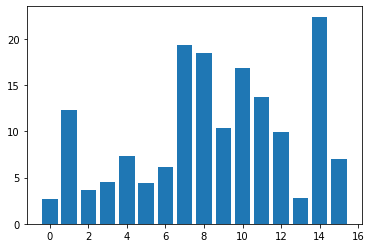

置換特徵最大值: 22.4067 ,特徵名稱為 Y-edge
置換特徵最小值: 2.6609 ,特徵名稱為 X_horizontal


In [9]:
list_knnimportance = []
results = permutation_importance(knnModel, x_train, y_train, scoring='neg_mean_squared_error')
importance = results.importances_mean

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.4f' % (i,v))
    list_knnimportance.append(v)

plt.bar([x for x in range(len(importance))], importance)
plt.show()

print("置換特徵最大值:",'%.4f'%max(list_knnimportance),",特徵名稱為",df1.columns[list_knnimportance.index(max(list_knnimportance))])
print("置換特徵最小值:",'%.4f'%min(list_knnimportance),",特徵名稱為",df1.columns[list_knnimportance.index(min(list_knnimportance))])

#Score越高, 代表模組越"仰賴"此特徵進行預測
#引用來源 https://machinelearningmastery.com/calculate-feature-importance-with-python/

### 特徵重要性篩選(最大3個/最小3個刪除)

In [10]:
y_knn001 = data_le['Class'].values
df_knn001= data_le.drop(labels=['Letter','Class','Y-edge','X2bar','Y2bar'],axis=1)
scaler_knn001 = MinMaxScaler(feature_range=(0,1)).fit(df_knn001)
x_knn001 = scaler_knn001.transform(df_knn001)

y_knn002 = data_le['Class'].values
df_knn002= data_le.drop(labels=['Letter','Class','X_horizontal','XegvY','Width'],axis=1)
scaler_knn002 = MinMaxScaler(feature_range=(0,1)).fit(df_knn002)
x_knn002 = scaler_knn002.transform(df_knn002)

In [11]:
x_train001,x_test001,y_train001,y_test001 = train_test_split(x_knn001,y_knn001,test_size=0.2, random_state=42)

list_knn001 = []
k_knn001 = 1
while k_knn001 <= 11:
    k_knn001 = k_knn001 + 2
    knnModel_check001 = KNeighborsRegressor(n_neighbors=k_knn001)
    knnModel_check001.fit(x_train001,y_train001)
    predicted_check001 = knnModel_check001.predict(x_test001)
    mae_check001 = metrics.mean_absolute_error(y_test001, predicted_check001)
    mape_check001 = metrics.mean_absolute_percentage_error(y_test001, predicted_check001)
    rmse_check001 = metrics.mean_squared_error(y_test001, predicted_check001, squared=False)
    list_knn001.append(mape_check001)

print(list_knn001,'\n')
print('刪除特徵最大值的MAPE最小值為:','%.4f'%min(list_knn001),',判定鄰居數量為',(list_knn001.index(min(list_knn001)))*2 + 1,'個')
print('\n')

x_train002,x_test002,y_train002,y_test002 = train_test_split(x_knn002,y_knn002,test_size=0.2, random_state=42)

list_knn002 = []
k_knn002 = 1
while k_knn002 <= 11:
    k_knn002 = k_knn002 + 2
    knnModel_check002 = KNeighborsRegressor(n_neighbors=k_knn002)
    knnModel_check002.fit(x_train002,y_train002)
    predicted_check002 = knnModel_check002.predict(x_test002)
    mae_check002 = metrics.mean_absolute_error(y_test002, predicted_check002)
    mape_check002 = metrics.mean_absolute_percentage_error(y_test002, predicted_check002)
    rmse_check002 = metrics.mean_squared_error(y_test002, predicted_check002, squared=False)
    list_knn002.append(mape_check002)

print(list_knn002,'\n')
print('刪除特徵最小值的MAPE最小值為:','%.4f'%min(list_knn002),',判定鄰居數量為',(list_knn002.index(min(list_knn002)))*2 + 1,'個')

[0.1987224423053241, 0.2297531080083506, 0.25142398171899644, 0.27517016495353436, 0.29562450271028995, 0.312136184706539] 

刪除特徵最大值的MAPE最小值為: 0.1987 ,判定鄰居數量為 1 個


[0.08641890823648042, 0.1082597562104704, 0.12699140917803034, 0.13969940912618192, 0.15392786875775777, 0.1680402009774375] 

刪除特徵最小值的MAPE最小值為: 0.0864 ,判定鄰居數量為 1 個


In [12]:
k_best001 = (list_knn001.index(min(list_knn001)))*2 + 1

knnModel001 = KNeighborsRegressor(n_neighbors=k_best001)
knnModel001.fit(x_train001,y_train001)
predicted001 = knnModel001.predict(x_test001)

mae001 = '%.4f'%metrics.mean_absolute_error(y_test001, predicted001)
mape001 = '%.4f'%metrics.mean_absolute_percentage_error(y_test001, predicted001)
rmse001 = '%.4f'%metrics.mean_squared_error(y_test001, predicted001, squared=False)

print('刪除特徵最大值後  MAE=', mae001, '  MAPE=', mape001, '  RSME=', rmse001)

k_best002 = (list_knn002.index(min(list_knn002)))*2 + 1

knnModel002 = KNeighborsRegressor(n_neighbors=k_best002)
knnModel002.fit(x_train002,y_train002)
predicted002 = knnModel002.predict(x_test002)

mae002 = '%.4f'%metrics.mean_absolute_error(y_test002, predicted002)
mape002 = '%.4f'%metrics.mean_absolute_percentage_error(y_test002, predicted002)
rmse002 = '%.4f'%metrics.mean_squared_error(y_test002, predicted002, squared=False)

print('刪除特徵最小值後  MAE=', mae002, '  MAPE=', mape002, '  RSME=', rmse002)

刪除特徵最大值後  MAE= 1.0448   MAPE= 0.1413   RSME= 3.6233
刪除特徵最小值後  MAE= 0.4395   MAPE= 0.0577   RSME= 2.3808


In [13]:
knncomparison = {
    "資料狀態":["原始資料預測數值","刪除置換特徵最大","刪除置換特徵最小"],
    "MAE":[mae,mae001,mae002],
    "MAPE":[mape,mape001,mape002],
    "RMSE":[rmse,rmse001,rmse002]}
df_knncomparison = pd.DataFrame(knncomparison)
print(df_knncomparison)

       資料狀態     MAE    MAPE    RMSE
0  原始資料預測數值  0.4363  0.0621  2.4089
1  刪除置換特徵最大  1.0448  0.1413  3.6233
2  刪除置換特徵最小  0.4395  0.0577  2.3808
